# Logistic Regression (강재영)

### - 로지스틱 회귀의 개요

#### · 베르누이 분포: 긍정 확률 p와 부정 확률 1-p를 갖는 랜덤 변수의 확률 분포 (이진 분류)
#### · 베르누이 분포를 따르는 반응 변수의 확률 범위는 0~1
#### · 선형 회귀는 특징 값의 일정한 변화로 반응 변수에도 일정한 변화가 일어난다는 가정을 하므로, 반응 변수가 확률을 나타낼 경우 가정이 유효하지 않음
#### · 일반화 선형 모델은 연결 함수를 사용해 특징의 선형 조합을 반응 변수와 연결 짓는 방법을 통해 선형 회귀의 가정을 없앰
#### · 특징의 선형 조합을 정규 분포를 따르지 않는 반응 변수와 연계하려면 연결 함수가 필요

### - 로지스틱 회귀와 분류

#### · 로지스틱 회귀의 반응 변수의 값 = 긍정(양성) 클래스의 확률
#### · 반응 변수의 값 >= 임계치 --> 긍정(양성) 클래스의 예측
#### · 반응 변수의 값 < 임계치 --> 부정(음성) 클래스의 예측
#### · 반응 변수는 "로지스틱 함수"를 사용해 특징의 선형 조합 합수로 모델링 됨
#### 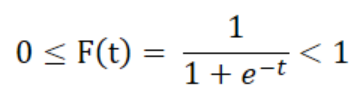
#### (로지스틱 함수: 테스트 인스턴스를 사용해서 값이 0~1 사이의 값이 나오게 계산해 주는 것)
#### · e는 오일러 상수(2.718,,, 무리수), t는 설명 변수의 조합
#### 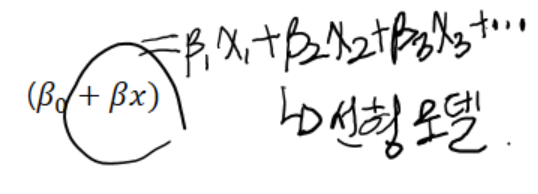
#### · 로지스틱 함수 = 시그모이드(sigmoid) 함수
### - 시그모이드 함수
#### · 시그모이드 함수는 S자 커브 형태를 가짐
#### · 시그모이드 함수 식: 
#### 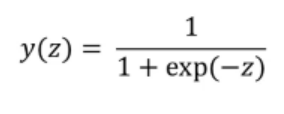

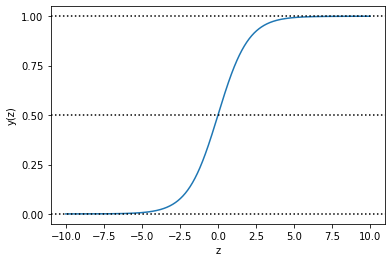

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sigmoid 함수 생성
def sigmoid(z):
    return 1.0 / (1+np.exp(-z))

#linespace를 이용하여 1000개의 데이터 구성 (구간: -10~10)
z = np.linspace(-10, 10, 1000)
#sigmoid 함수를 호출하여 y값 구성
y = sigmoid(z)
plt.plot(z,y)
#axhline을 이용하여 x축과 수평한 선 그리기 (":"을 통하여 점선으로 표현)
plt.axhline(y=0, linestyle=":", color="black")
plt.axhline(y=0.5, linestyle=":", color="black")
plt.axhline(y=1, linestyle=":", color="black")
#축 라벨링
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)');

#### 위 시그모이드 함수에서 임계치(threshold)는 0.5
#### 반응 변수 값이 0.5 이상 --> 1
#### 반응 변수 값이 0.5 미만 --> 0

### - 로짓 함수
#### · 로짓(Logit) 함수: 로지스틱 함수의 역함수
#### · F(x)를 다시 특징의 조합으로 돌림
#### 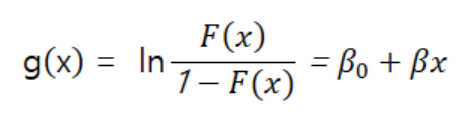
#### · 역함수를 적용하면 선형 방정식을 얻을 수 있음
#### · 오즈(Odds): 클래스 0에 속하는 확률에 대한 클래스 1에 속하는 확률의 비
#### 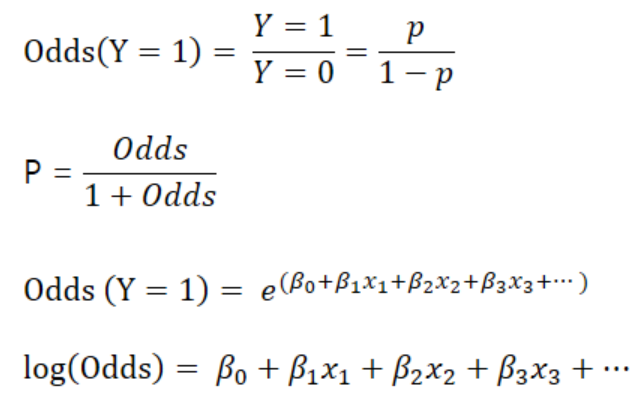

## -- Heart Disease Prediction --
### https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction?select=framingham_heart_disease.csv 데이터 사용

In [36]:
#데이터 셋 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('framingham_heart_disease.csv')

In [37]:
#데이터 셋 정보 확인
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [38]:
#데이터 셋 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [39]:
#결측치 개수 확인
train.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### train
##### · male: 성별
##### · age: 나이
##### · education: 교육수준
##### · currentSmoker: 현재 흡연유무
##### · cigsPerDay: 하루 흡연량
##### · BPMeds: 혈압약 복용 여부
##### · prevalentStroke: 뇌졸중 이력
##### · prevalentHyp: 고혈압 이력
##### · diabetes: 당뇨병 여부
##### · totChol: 총 콜레스테롤 수치
##### · sysBP: 수축기 혈압
##### · diaBP: 이완기 혈압
##### · BMI: 체질량 지수
##### · heartRate: 심박수
##### · glucose: 포도당 지수
##### · TenyearCHD: 10년 내 관상동맥성 심장병 발병 여부

In [40]:
#education은 심장병에 영향을 미치지 않기 때문에 삭제
train = train.drop('education',axis=1)
#currentSmoker은 하루 흡연량 칼럼이 있기 때문에 대체할 수 있으므로 삭제
train = train.drop('currentSmoker',axis=1)
#cigsPerDay, BPMeds 결측치는 0으로 대체
train['cigsPerDay'] = train['cigsPerDay'].fillna(0)
train['BPMeds'] = train['BPMeds'].fillna(0)
#totChol, BMI, heartRate, glucose 결측치는 평균값으로 대체
train = train.fillna({'totChol': train['totChol'].mean()})
train = train.fillna({'BMI': train['BMI'].mean()})
train = train.fillna({'heartRate': train['heartRate'].mean()})
train = train.fillna({'glucose': train['glucose'].mean()})

In [41]:
#결측치 개수 확인
train.isna().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>],
       [<AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>],
       [<AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>],
       [<AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

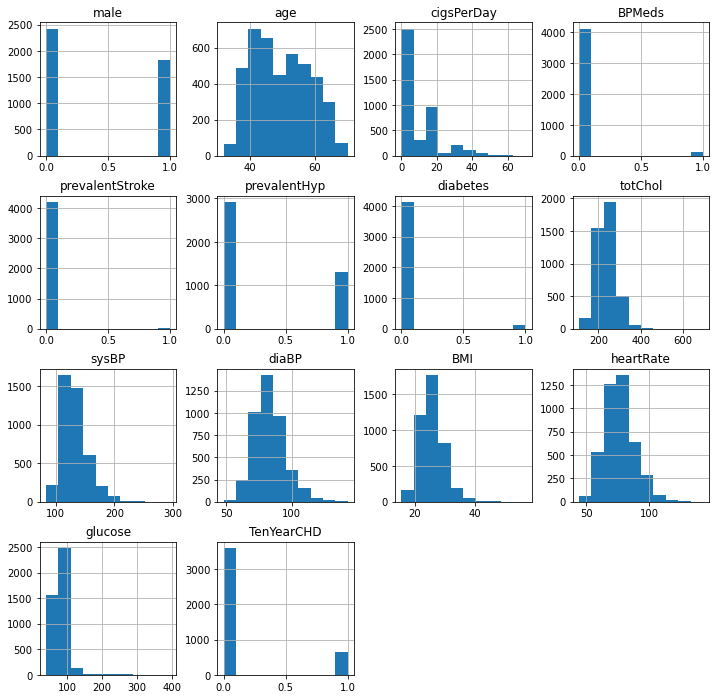

In [42]:
#히스토그램 표현
train.hist(figsize=(12,12))

<AxesSubplot:title={'center':'Target Rate'}, ylabel='TenYearCHD'>

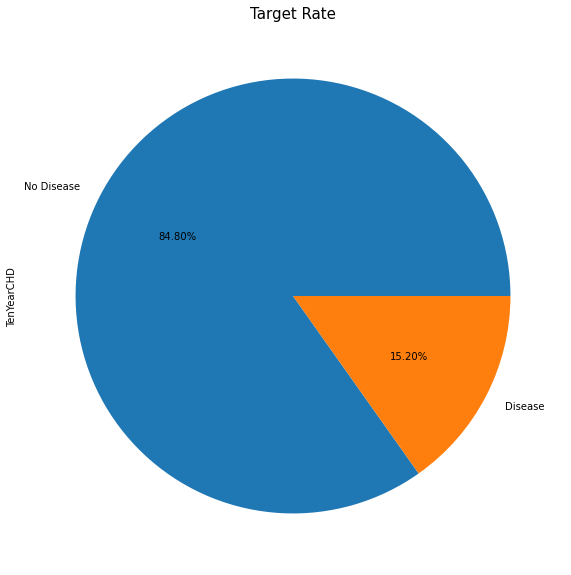

In [43]:
#타겟에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(10,10))
plt.title('Target Rate', fontsize=15)
train['TenYearCHD'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['No Disease', 'Disease'])

### - 범주형 column:
#### male, BPMeds, prevalentStroke, prevalentHyp, diabetes

<AxesSubplot:xlabel='diabetes', ylabel='count'>

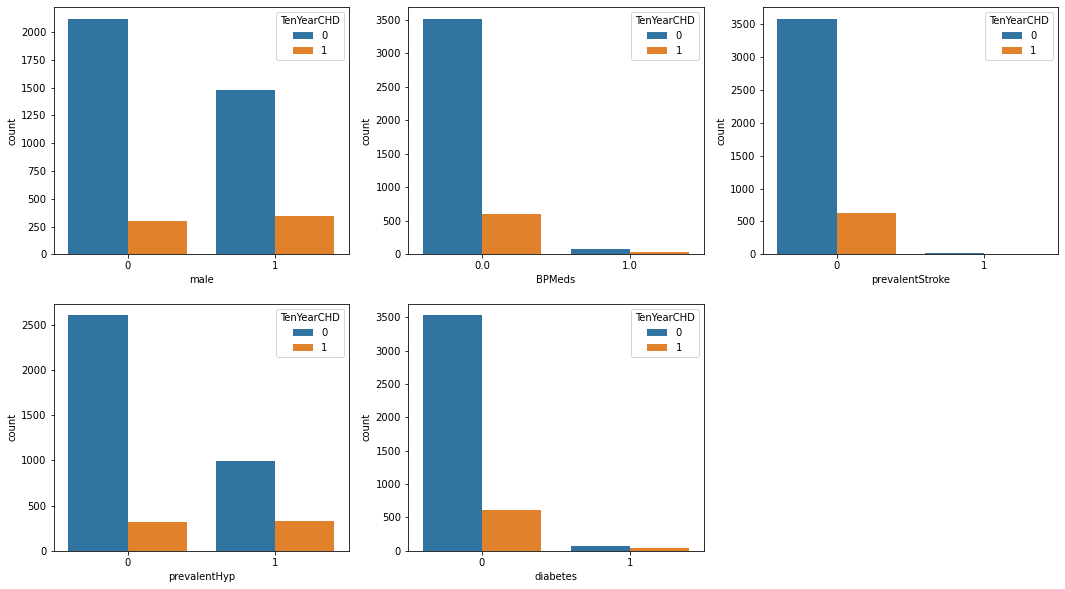

In [44]:
#범주형 column 시각화
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.countplot(data=train,x='male',hue='TenYearCHD')
        
plt.subplot(2,3,2)
sns.countplot(data=train,x='BPMeds',hue='TenYearCHD')
        
plt.subplot(2,3,3)
sns.countplot(data=train,x='prevalentStroke',hue='TenYearCHD')
        
plt.subplot(2,3,4)
sns.countplot(data=train,x='prevalentHyp',hue='TenYearCHD')
        
plt.subplot(2,3,5)
sns.countplot(data=train,x='diabetes',hue='TenYearCHD')


### - 연속형 column:
#### age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose

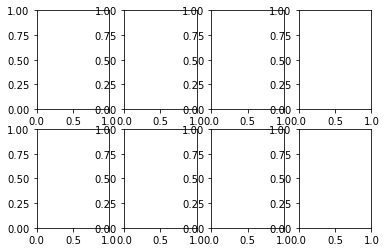

<Figure size 1296x720 with 0 Axes>

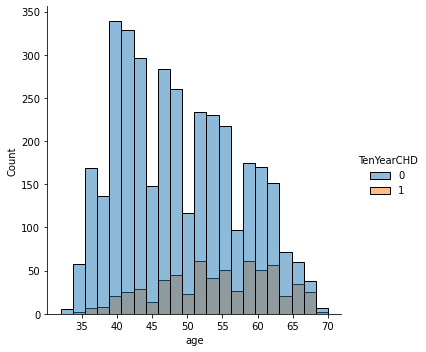

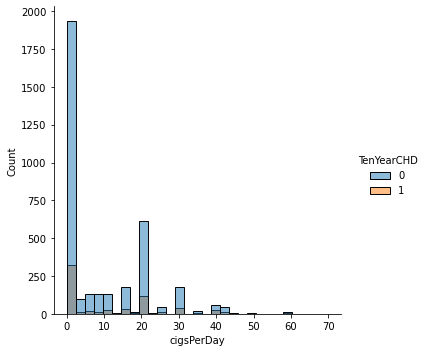

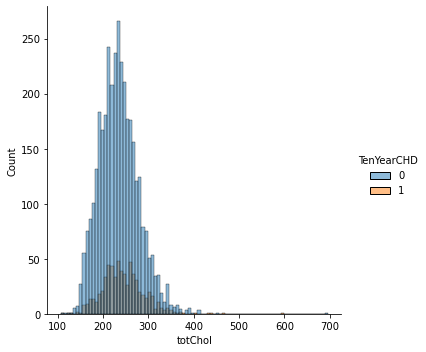

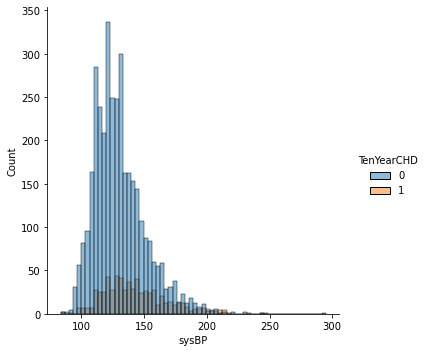

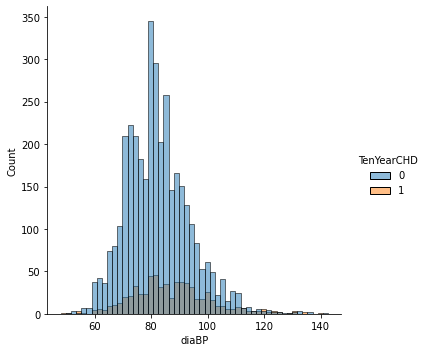

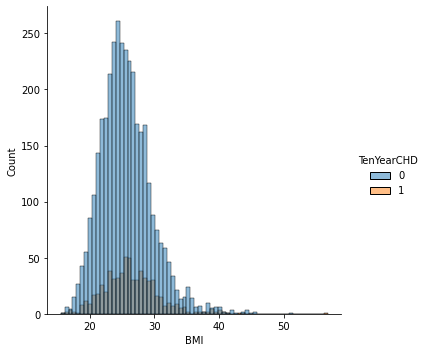

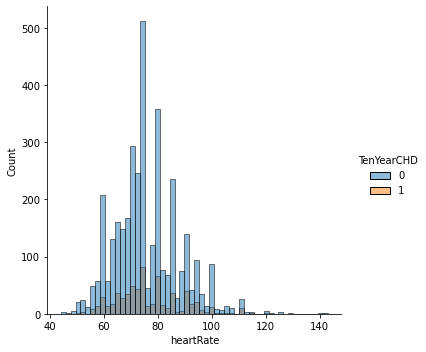

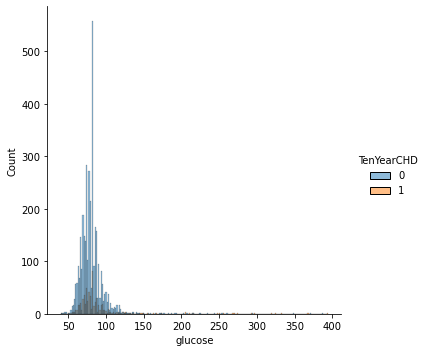

In [45]:
#연속형 column 시각화
figure,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8))=plt.subplots(nrows=2,ncols=4)
plt.figure(figsize=(18,10))

sns.displot(train, x="age", hue="TenYearCHD", ax=ax1)

sns.displot(train, x="cigsPerDay", hue="TenYearCHD", ax=ax2)

sns.displot(train, x="totChol", hue="TenYearCHD", ax=ax3)

sns.displot(train, x="sysBP", hue="TenYearCHD", ax=ax4)

sns.displot(train, x="diaBP", hue="TenYearCHD", ax=ax5)

sns.displot(train, x="BMI", hue="TenYearCHD", ax=ax6)

sns.displot(train, x="heartRate", hue="TenYearCHD", ax=ax7)

sns.displot(train, x="glucose", hue="TenYearCHD", ax=ax8)

In [46]:
#x, y에 대해 정의
x=train.drop('TenYearCHD',axis=1)
y=train['TenYearCHD']

In [47]:
#데이터 셋 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.3,random_state=0)

### - Accuracy(정확도)
#### : 올바르게 예측된 데이터의 수를 전체 데이터의 수로 나눈 값
### - ROC Curve(Receiver-Operating Characteristic curve)
#### : 민감도와 특이도의 관계가 보이는 양상을 2차원 평면상에 그려낸 것
#### 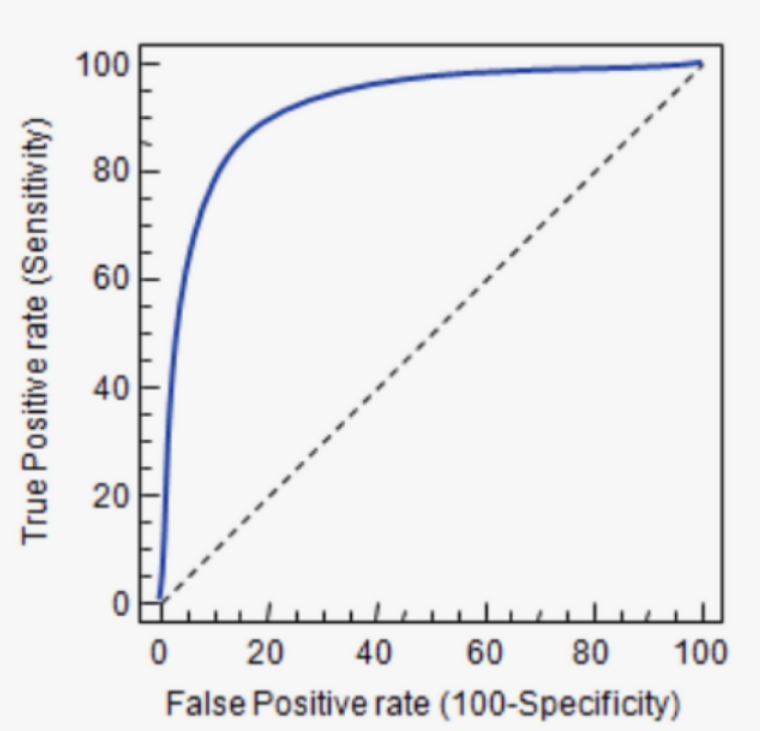
### - AUC(Area Under Curve)
#### : ROC Curve의 면적, AUC의 값이 1일 수록 좋은 모델이라 평가된다.

In [48]:
#로지스틱 회귀 이용하여 학습 및 예측 수행
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

#정확도와 roc_auc 측정
from sklearn.metrics import accuracy_score, roc_auc_score
#정확도: 실측값, 예측값 순으로 작성
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc:{:0.4f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.8467
roc_auc:0.5179


### - 로지스틱 회귀의 주요 하이퍼 파라미터: C, penalty
#### · C: 규제 강도를 조절하는 alpha 값의 역수
#### (C값이 작을 수록 규제 강도가 큼)
#### · penalty: L1 규제와 L2 규제
#### (L1 규제 --> 0이 됨, L2 규제 --> 0에 가까워짐)

#### - GridSearchCV를 이용하여 최적화

In [49]:
# GridSearchCV: 그리드를 사용한 복수 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1','l2'],'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(x, y)

#best_score_: 최고 점수, best_params_: 최고 점수를 낸 파라미터
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.4f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.8502


#### C 범위를 좁힌 후 다시 최적화

In [50]:
# GridSearchCV: 그리드를 사용한 복수 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1','l2'],'C':[0.03, 0.05, 0.07, 0.1, 0.12, 0.15, 0.2, 0.3]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(x, y)

#best_score_: 최고 점수, best_params_: 최고 점수를 낸 파라미터
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.4f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.05, 'penalty': 'l2'}, 최적 평균 정확도:0.8504


#### C 범위를 좁힌 후 다시 최적화

In [51]:
# GridSearchCV: 그리드를 사용한 복수 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1','l2'],'C':[0.04, 0.045, 0.047, 0.05, 0.052, 0.55, 0.57]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(x, y)

#best_score_: 최고 점수, best_params_: 최고 점수를 낸 파라미터
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.4f}'.format(grid_clf.best_params_, grid_clf.best_score_))

clf_best = grid_clf.best_estimator_

최적 하이퍼 파라미터:{'C': 0.05, 'penalty': 'l2'}, 최적 평균 정확도:0.8504


### 최적 하이퍼 파라미터: C --> 0.05, penalty --> L2 (평균 정확도 = 85.04%)

In [52]:
#ROC curve 표현
from sklearn.metrics import roc_auc_score, roc_curve
#로지스틱 회귀는 확률 기반이므로 predic가 아닌 predict probability(predict_proba) 사용
#x_test 데이터로 확률을 가져오는데 양성 확률은 2번째 열에 저장됨
lr_preds_proba = clf_best.predict_proba(x_test)[:,1]
lr_preds_proba

array([0.09658135, 0.3995464 , 0.23686935, ..., 0.22164628, 0.08666496,
       0.1999415 ])

### - FPR: False Positive Rate (ROC curve에서 x축에 표시되는 값)
### - TPR: True Positive Rate (ROC curve에서 y축에 표시되는 값)

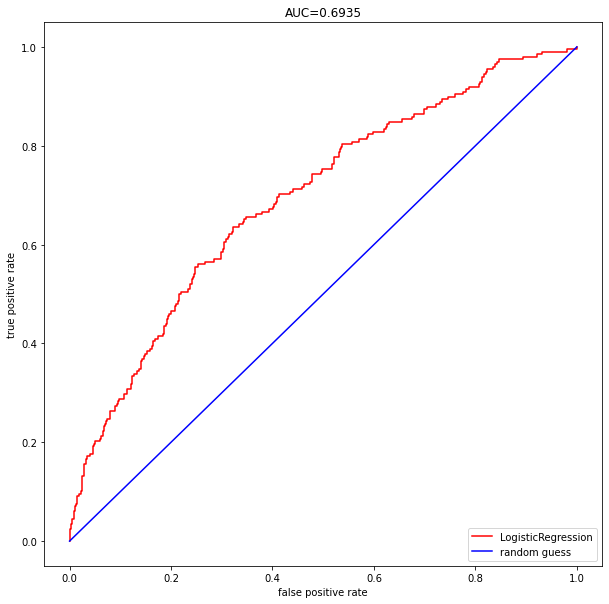

In [53]:
#ROC curve 표현
fpr, tpr, _ = roc_curve(y_test, lr_preds_proba)
#roc_auc_score 함수를 이용하여 곡선의 밑면적과 관련된 정보 사용
auc = roc_auc_score(y_test, lr_preds_proba)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, "r-", label="LogisticRegression")
plt.plot([0, 1], [0, 1], "b-", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.4f}".format(auc))
plt.legend(loc="lower right");